In [1]:
# Importing librraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Importing dataset
dataset = pd.read_csv("C:\\Users\\Parul\\Desktop\\DATASETS\\titanic_train.csv")
dataset.shape

(891, 12)

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.info() #find the values of info from data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


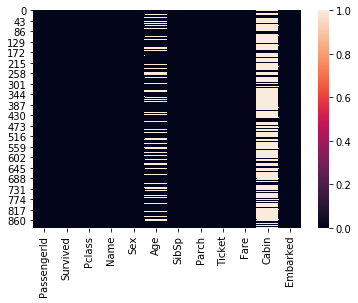

In [5]:
# To check the null values
sb.heatmap(pd.isnull(dataset))

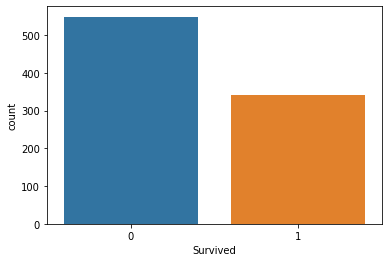

In [6]:
sb.countplot(x='Survived',data = dataset)

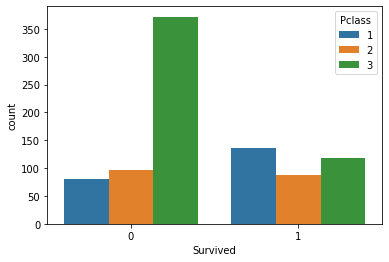

In [7]:
sb.countplot(x='Survived',hue = 'Pclass',data = dataset)

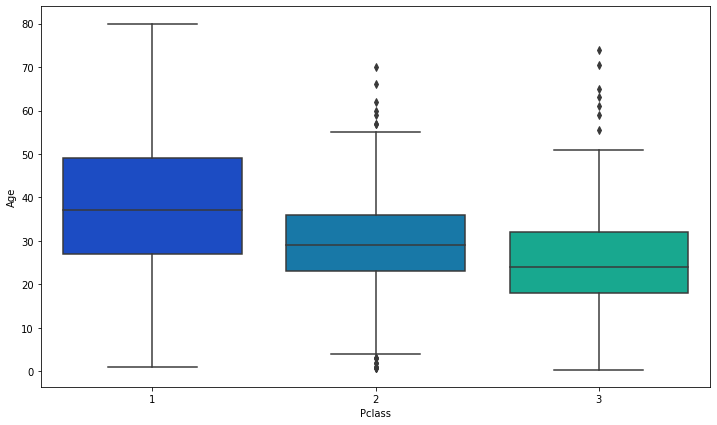

In [8]:
plt.figure(figsize=(12,7))
sb.boxplot(x='Pclass', y='Age', data=dataset, palette='winter')

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [10]:
dataset['Age'] = dataset[['Age', 'Pclass']].apply(impute_age, axis=1)

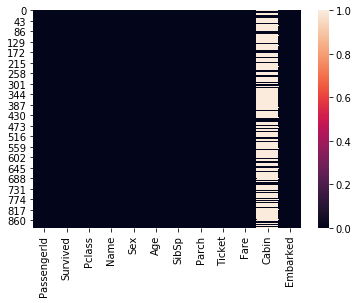

In [11]:
sb.heatmap(dataset.isnull())

In [12]:
dataset.drop('Cabin', axis =1, inplace = True)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [14]:
dataset.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [15]:
common_value = 'S'
dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [16]:
sex = pd.get_dummies(dataset['Sex'], drop_first = True)
embark = pd.get_dummies(dataset['Embarked'], drop_first = True)

In [17]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [18]:
dataset = pd.concat([dataset,sex,embark], axis =1)

In [19]:
dataset.shape

(891, 9)

In [20]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Survived',axis=1),dataset['Survived'],
                                                    test_size =0.20, random_state = 101)

In [22]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Parul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
predictions = logmodel.predict(X_test)

In [24]:
logmodel.score(X_train,y_train)

0.8089887640449438

In [25]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,1,45.5,0,0,28.500,1,0,1
700,1,18.0,1,0,227.525,0,0,0
748,1,19.0,1,0,53.100,1,0,1
751,3,6.0,0,1,12.475,1,0,1
481,2,29.0,0,0,0.000,1,0,1


In [26]:
logmodel.score(X_test,y_test)

0.7988826815642458

In [27]:
logmodel.predict(X_test)[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [28]:
logmodel.predict_proba(X_test)[0:5]

array([[0.68922078, 0.31077922],
       [0.03544584, 0.96455416],
       [0.56258477, 0.43741523],
       [0.82130367, 0.17869633],
       [0.78997294, 0.21002706]])

In [29]:
#Importing dataset for test file
dataset_test = pd.read_csv("C:\\Users\\Parul\\Desktop\\Excells fun\\SIMPLILEARN\\INVENTATEQ\\DATASETS\\titanic_test.csv")
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [30]:
dataset_test['Age'] = dataset[['Age', 'Pclass']].apply(impute_age, axis=1) # Apply missing value in Age
dataset_test.fillna(method='ffill', inplace= True) #Impute missing value in fare colomn

In [31]:
#Categorical data encoding
sex_test = pd.get_dummies(dataset_test['Sex'],drop_first=True)
embark_test = pd.get_dummies(dataset_test['Embarked'], drop_first=True)

In [32]:
PassengerID = dataset_test['PassengerId']

In [33]:
#Dropping redundant coloumn
dataset_test.drop(['PassengerId','Sex','Embarked','Name','Ticket','Cabin'], axis =1, inplace = True)

In [34]:
#concating the encoding coloumn Sec and Embarked
dataset_test = pd.concat([dataset_test,sex_test,embark_test],axis=1)

In [35]:
dataset_test.shape
dataset_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,0,0,7.8292,1,1,0
1,3,38.0,1,0,7.0000,0,0,1
2,2,26.0,0,0,9.6875,1,1,0
3,3,35.0,0,0,8.6625,1,0,1
4,3,35.0,1,1,12.2875,0,0,1


In [36]:
X_test = dataset_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
male      418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.6 KB


In [37]:
y_pred_test = logmodel.predict(X_test)

In [38]:
logmodel.predict_proba(X_test)[0:5]

array([[0.85948189, 0.14051811],
       [0.56004567, 0.43995433],
       [0.75019444, 0.24980556],
       [0.90397793, 0.09602207],
       [0.55065707, 0.44934293]])

In [39]:
finalDf = pd.DataFrame({"PassengerID": PassengerID, "Survived":y_pred_test})

In [40]:
finalDf.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [41]:
finalDf.shape

(418, 2)

In [42]:
finalDf.to_csv('titanic_predictions.csv',index=False)